In [1]:
from utils.dataset import CocoDataset
import torch
from utils.model_utils import InferFasterRCNN,display_gt_pred
from pycocotools.coco import COCO
import os

In [2]:
train_ds = CocoDataset(
        image_folder=r"D:\Work\work\FasterRCNN-Torchvision-FineTuning\dataset\AquariumDataset\train\images",
        annotations_file=r"D:\Work\work\FasterRCNN-Torchvision-FineTuning\dataset\AquariumDataset\train\_annotations.coco_neg.json",
        height=640,
        width=640,
    )

print(train_ds.get_classnames())

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

IF_C = InferFasterRCNN(num_classes=train_ds.get_total_classes_count() + 1,
                       classnames=train_ds.get_classnames())

IF_C.load_model(checkpoint=r'weight_outputs_best\best_model.pth',
                device=device)

['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']


In [3]:
train_image_dir = r'D:\Work\work\FasterRCNN-Torchvision-FineTuning\dataset\AquariumDataset\train\images'
cocoGt=COCO(r"D:\Work\work\FasterRCNN-Torchvision-FineTuning\dataset\AquariumDataset\train\_annotations.coco_neg.json")

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [4]:
imgIds = cocoGt.getImgIds() # all image ids
print(len(imgIds))

id = 221

img_info = cocoGt.loadImgs(imgIds[id])[0]
annIds = cocoGt.getAnnIds(imgIds=img_info['id'])
ann_info = cocoGt.loadAnns(annIds)
image_path = os.path.join(train_image_dir, 
                          img_info['file_name'])

transform_info = CocoDataset.transform_image_for_inference(image_path,width=640,height=640)
result = IF_C.infer_image(transform_info=transform_info,
                         visualize=False)

450


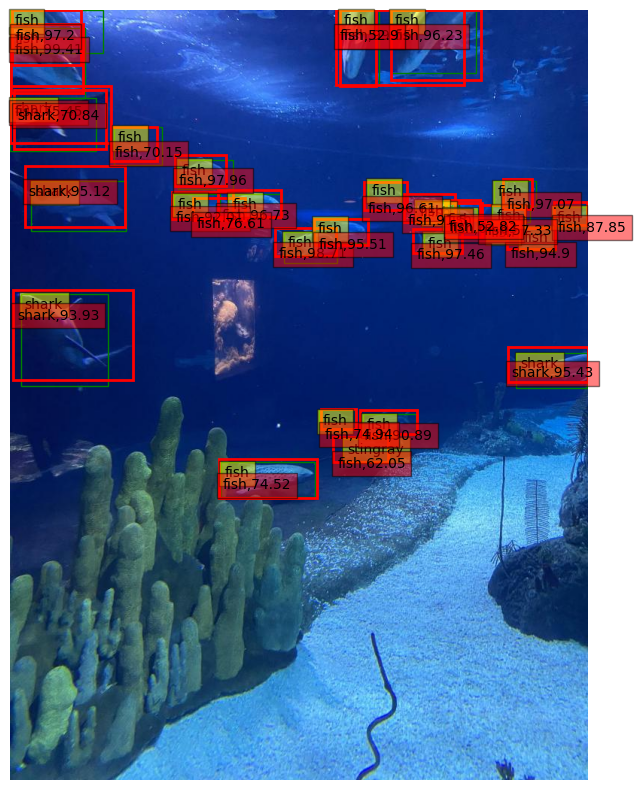

In [5]:
gts_cls = [i['category_id'] for i in ann_info]
gts_bbox = [[i['bbox'][0],
             i['bbox'][1],
             i['bbox'][0]+i['bbox'][2],
             i['bbox'][1]+i['bbox'][3]] for i in ann_info] # convert to xyxy

pred_boxes = result['unscaled_boxes']
pred_classes = result['pred_classes']
pred_scores = result['scores']

display_gt_pred(image_path=image_path,
                gt_boxes=gts_bbox,
                gt_class=gts_cls,
                pred_boxes=pred_boxes,
                pred_class=pred_classes,
                pred_scores=pred_scores,
                classnames=['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'],
                box_format='xyxy')